# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados abaixo que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIST), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois gradientes em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o menor valor testado e 10 o maior valor testado, enquanto é sabido que diversos modelos de machine learning usam 0.1 como taxa de aprendizagem). Outra característica importante dos testes que serão apresentados neste notebook é a determinação do uso de somente treino e teste para este trabalho prático. A base de dados é pequena para usá-la como treino, teste e validação, como provavelmente seria usado em uma aplicação prática no mundo real. Assim, o conjunto disponibilizado para o TP foi dividido em 80% para treino e 20% para teste. 

O primeiro resultado importante é mostrado na figura abaixo e representa a comparação dos gradientes em função dos learning rates e unidades da camada oculta disponibilizadas na descrição do TP (i.e., learning rate é 0.5, 1, e 10 e as unidades da camada oculta são 25, 50 e 100). Nos resultados, notamos que o mini-batch foi o gradiente de backpropagation mais eficiente entre os testados, com destaque para o mini-batch de 50 batches que obteve resultados ligeiramente melhores do que o mini-batch de 10, e foi menos sucinto a grande perda com as variações do learning rate e unidades da camada oculta. É interessante notar que o mini-batch também foi muito mais rápido para ser executado do que os outros gradientes, no entanto, o autor não mediu o tempo, apenas constatou empiricamente. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. É importante notar que o learning rate de 10 sempre convergiu para os 4 tipos de gradientes testados, no sentido de que todos eles obtiveram resultados muitos ruins com este learning rate. Como vimos em sala de aula, muitos dos modelos de machine learning amplamente usados na academia usam um learning rate de 0.1. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era altíssimo para o problema de classificação de imagens. Sendo que este learning rate obteve um training error de cerca de 90% para todos os 3 gradientes testados independente das outras métricas do modelo.

Desta forma, eu aprendi que em uma análise real do MNIST o mais adequado seria ter um conjunto de treino (assim como foi testado o modelo), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste se estivéssemos tratando de um caso real de aplicação de machine learning. Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 0.5, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes. Somente o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5. 

Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 

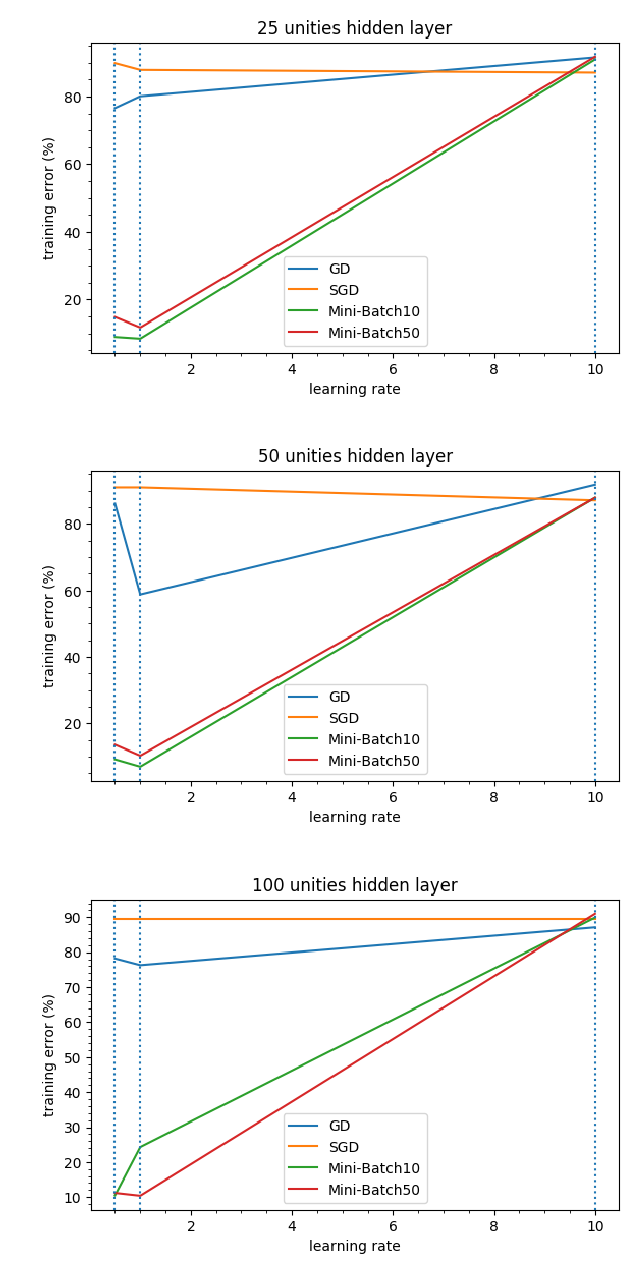

In [2]:
img1 = mpimg.imread('img/25-unities-hidden-layer.png')
img2 = mpimg.imread('img/50-unities-hidden-layer.png')
img3 = mpimg.imread('img/100-unities-hidden-layer.png')

plt.figure(figsize=(20,18))
plt.subplot(3, 1, 1)
plt.axis('off')
plt.tight_layout()
plt.imshow(img1)

plt.subplot(3, 1, 2)
plt.axis('off')
plt.tight_layout()
plt.imshow(img2)

plt.subplot(3, 1, 3)
plt.axis('off')
plt.tight_layout()
plt.imshow(img3)
plt.show()

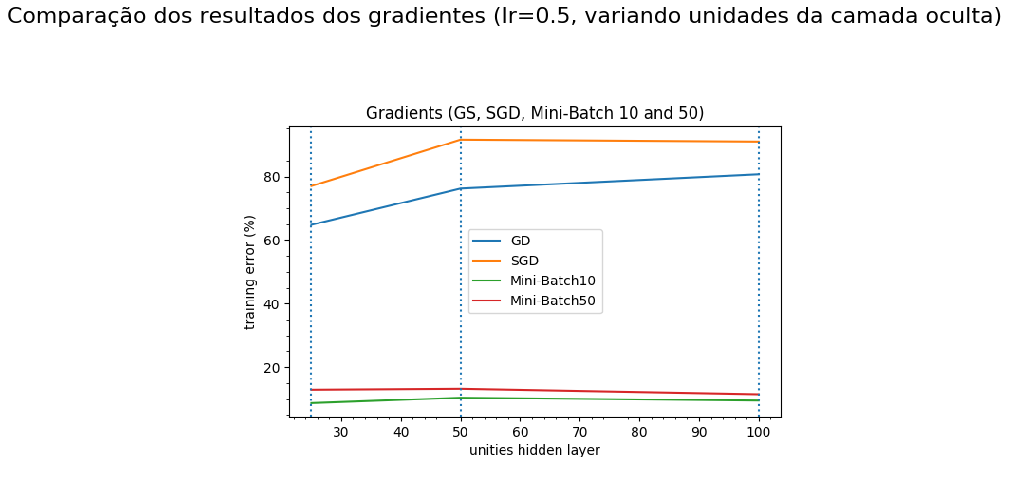

In [13]:
img = mpimg.imread('img/comparison-gradients.png')
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.suptitle("Comparação dos resultados dos gradientes (lr=0.5, variando unidades da camada oculta)", size=22)
imgplot = plt.imshow(img)

O teste apresentado acima é interessante para analisarmos o número de unidades da camada oculta e como isso teria impacto no modelo de machine learning proposto. Como podemos notar pelo gráfico, o número de unidades da camada oculta não modificava os resultados do nosso modelo de forma significativa. Em dois dos gradientes de backpropation, i.e., GD e SGD o aumento do número de unidades foi pior para o modelo, ou seja, com 100 unidades obtivemos piores resultados do que com 25 unidades, por exemploe. Para os dois gradientes de Mini-batch, i.e., de 10 e 50, eles foram praticamente constantes em relação ao error e o aumento do número de unidades da camada oculta. 

Desta forma, podemos concluir que o aumento de unidades da camada oculta não foi uma característica relevante do modelo para o problema de classificação de imagens. Nos testes realizados abaixo, vamos mos

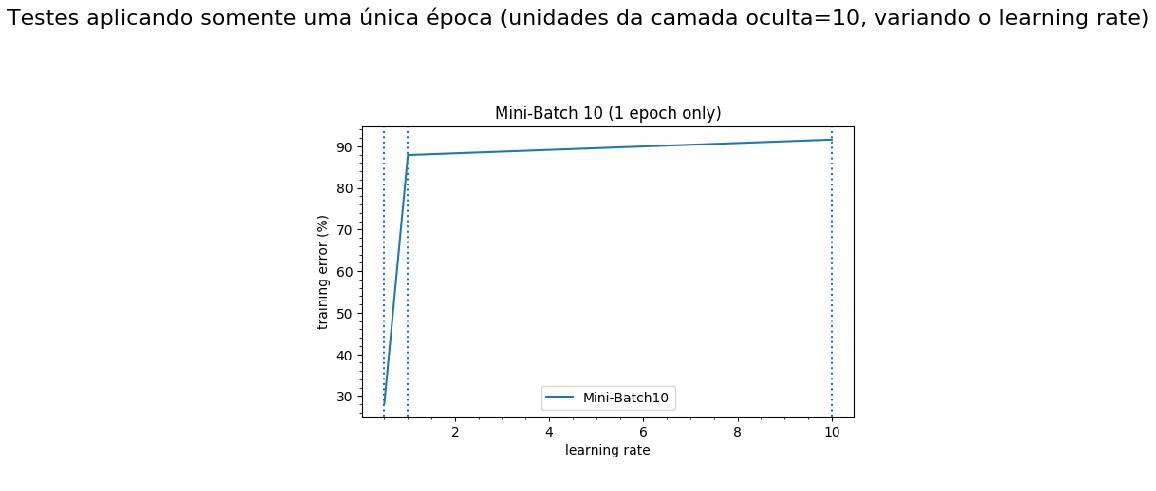

In [54]:
img = mpimg.imread('img/one-epoch.png')
plt.figure(figsize=(10, 8))
plt.suptitle("Testes aplicando somente uma única época (unidades da camada oculta=10, variando o learning rate)", size=22)
plt.axis('off')
imgplot = plt.imshow(img)

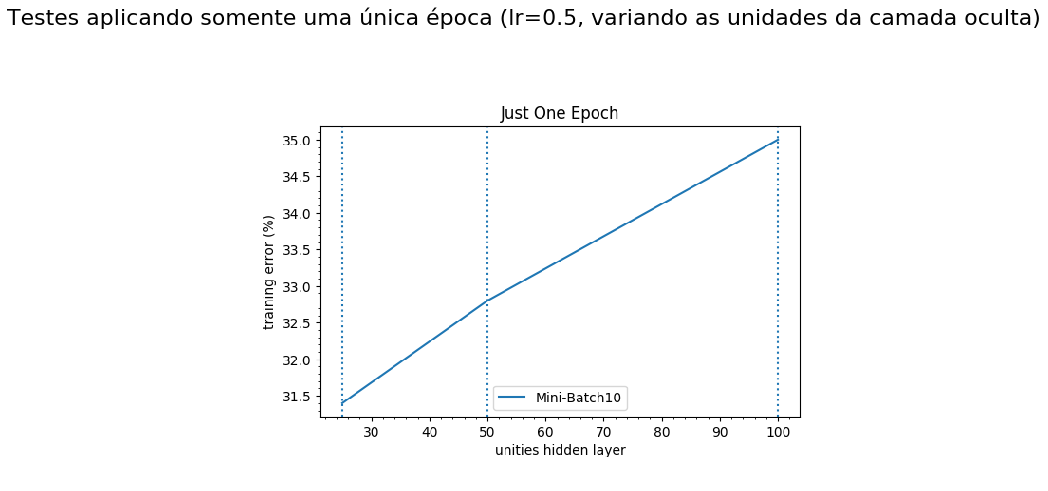

In [45]:
img = mpimg.imread('img/one-epoch-unities.png')
plt.figure(figsize=(10, 8))
plt.suptitle("Testes aplicando somente uma única época (lr=0.5, variando as unidades da camada oculta)", size=22)
plt.axis('off')
imgplot = plt.imshow(img)

Os testes aplicando somente uma época encontrou resultados muito ruins se comparados aos testes realizados com mais épocas. O erro foi bastante elevado e o modelo não aprendeu qualquer coisa. Isso moestra a importância em setar um número de épocas interessante para o modelo, principalmente levando em consideração que não estamos usando um conjunto de validação para o modelo. Isso porque, o dataset é pequeno (somente 5000 amostras) para tornar-se teste, validação e treino. Assim, optei por somente usar teste e validação.

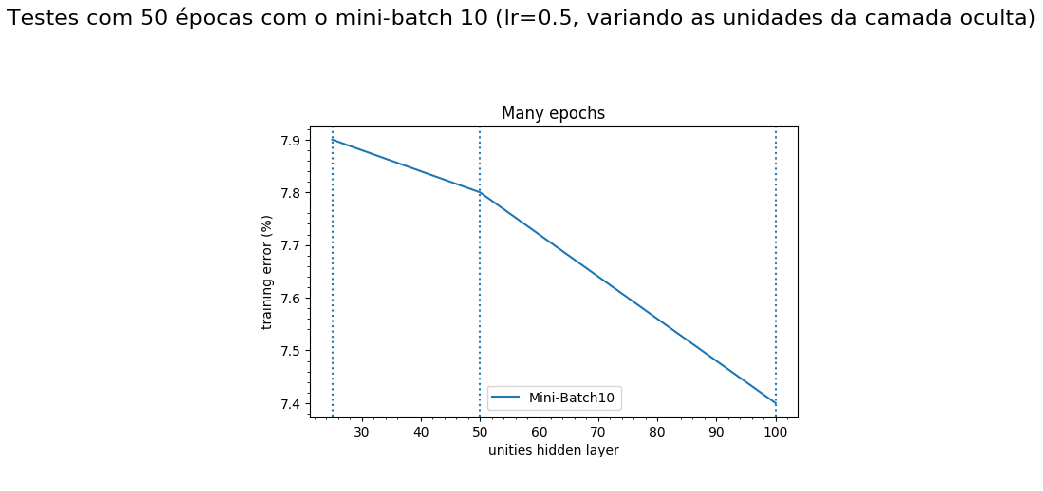

In [55]:
img = mpimg.imread('img/many-epochs-unities.png')
plt.figure(figsize=(10, 8))
plt.suptitle("Testes com 50 épocas com o mini-batch 10 (lr=0.5, variando as unidades da camada oculta)", size=22)
plt.axis('off')
imgplot = plt.imshow(img)

Para testarmos se o aumentando o número de épocas o modelo melhoraria os resultados, assim como era imaginado, o modelo obteve resultados melhores com 50 épocas em vez de somente 10. No entanto, é importante notar que isso aconteceu devido ao overfitting do modelo, assim, o training error de fato decaiu com o aumento de épocas, todavia, o test error deve ter aumentado, e assim o modelo conhece muito sobre os dados que foram testados para treino, mas o modelo deve ser ruim para dados que não conhecemos. Assim os testes com mais épocas, apesar de apresentar melhores resultados do que com 10, é um modelo overfitting e não pode ser considerado para qualquer classificação aplicável do problema de classificação de imagens.

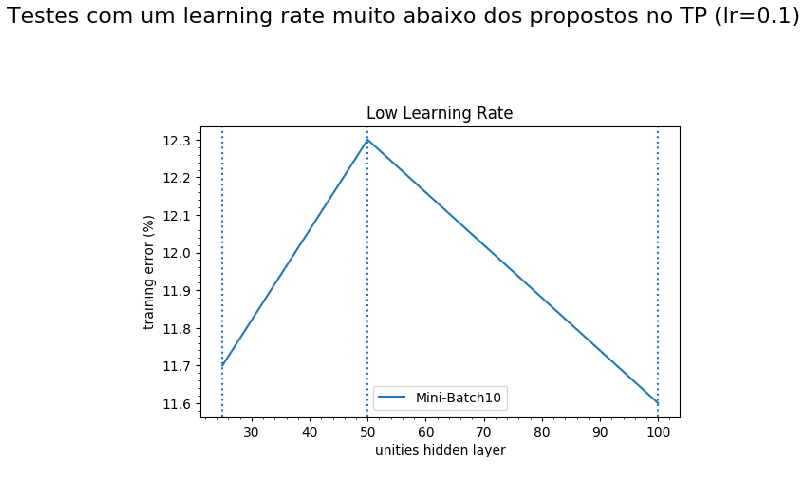

In [56]:
img = mpimg.imread('img/low-learning-rate.png')
plt.figure(figsize=(10, 8))
plt.suptitle("Testes com um learning rate muito abaixo dos propostos no TP (lr=0.1)", size=22)
plt.axis('off')
imgplot = plt.imshow(img)

Testando um learning rate menor do que o proposto no enunciado do TP, foi notado que um learning rate torna o modelo menos suscetível ao aumento do número de unidades da camada oculta. Entretanto, os resultados não são superiores aos resultados testando, como por exemplo, com 0.5 de learning rate que foi o índice do enunciado com os melhores resultados atingidos. Assim, devido as características deste problema, o learning rate só seria indicado ser baixo assim (0.1) se pretendesermos aumentar muito o número de unidades da camada oculta.

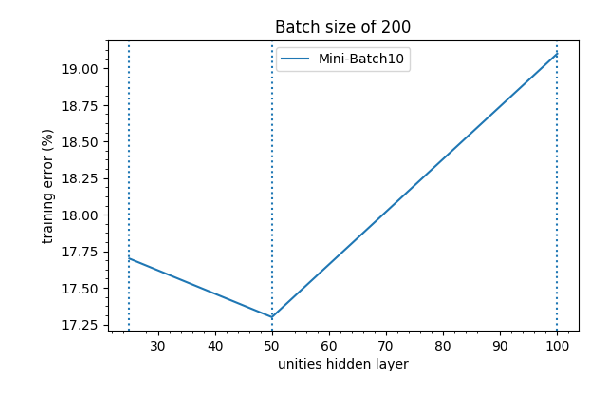

In [57]:
img = mpimg.imread('img/batches-maiores.png')
plt.figure(figsize=(10, 8))
plt.axis('off')
imgplot = plt.imshow(img)

Analisando o aumento do número de batches do modelo, foi notado que o aumento do número de batches serve para estabilizar o o training error, no entanto, isso não significa que os resultados serão melhores ou piores comparados com menos batches. 

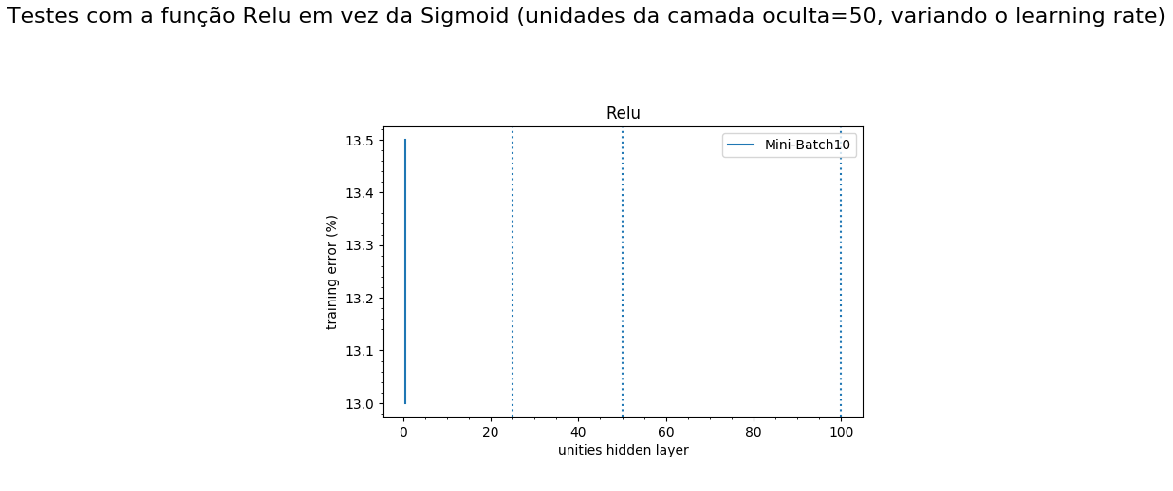

In [58]:
img = mpimg.imread('img/relu.png')
plt.figure(figsize=(10, 8))
plt.suptitle("Testes com a função Relu em vez da Sigmoid (unidades da camada oculta=50, variando o learning rate)", size=22)
plt.axis('off')
imgplot = plt.imshow(img)

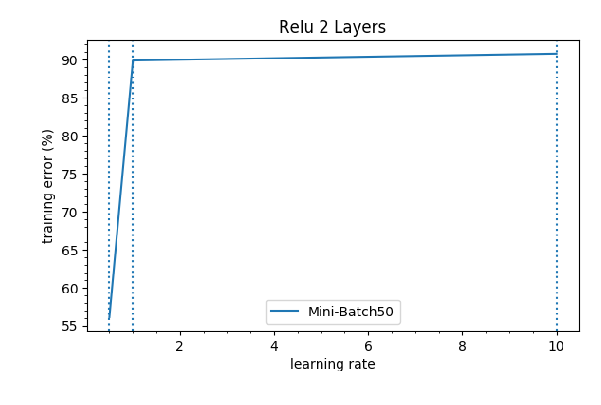

In [8]:
img = mpimg.imread('img/relu-2-layer.png')
plt.figure(figsize=(10, 8))
plt.axis('off')
imgplot = plt.imshow(img)

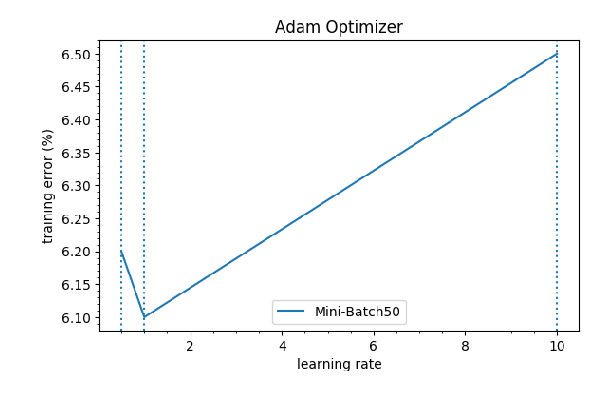

In [9]:
img = mpimg.imread('img/adam-gradient.png')
plt.figure(figsize=(10, 8))
plt.axis('off')
imgplot = plt.imshow(img)

In [ ]:
img = mpimg.imread('img/adam-gradient.png')
plt.figure(figsize=(10, 8))
plt.axis('off')
imgplot = plt.imshow(img)

In [ ]:
Um dos testes mais importantes que queria realizar durante o pro